In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

In [5]:
# %% [markdown]
## Prepare Dataset

##Code cell <Md-nuU-BQpo3>
# %% [code]
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


In [6]:
## Create Model

##Code cell <ABR85VMcQppM>
# %% [code]
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
## Compile Model

##Code cell <K3OcHt-TQppf>
# %% [code]
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,154 (422.48 KB)

 Trainable params: 108,154 (422.48 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
## Train Model

##code cell <l4hi0rW_QpqL>
# %% [code]
epochs = 10
history = model.fit(
  train_images,
  train_labels,
  epochs = epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 213s 113ms/step - accuracy: 0.8972 - loss: 0.3185
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 207s 110ms/step - accuracy: 0.9849 - loss: 0.0473
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 110ms/step - accuracy: 0.9898 - loss: 0.0329
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 207s 110ms/step - accuracy: 0.9911 - loss: 0.0258
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 111ms/step - accuracy: 0.9920 - loss: 0.0235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 109ms/step - accuracy: 0.9936 - loss: 0.0201
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 111ms/step - accuracy: 0.9947 - loss: 0.0159
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 109ms/step - accuracy: 0.9955 - loss: 0.0131
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 109ms/step - accuracy: 0.9965 - loss: 0.0121
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 209s 111ms/step - accuracy: 0.9969 - loss: 0.0097


Text(0.5, 1.0, 'Training Accuracy and Loss')

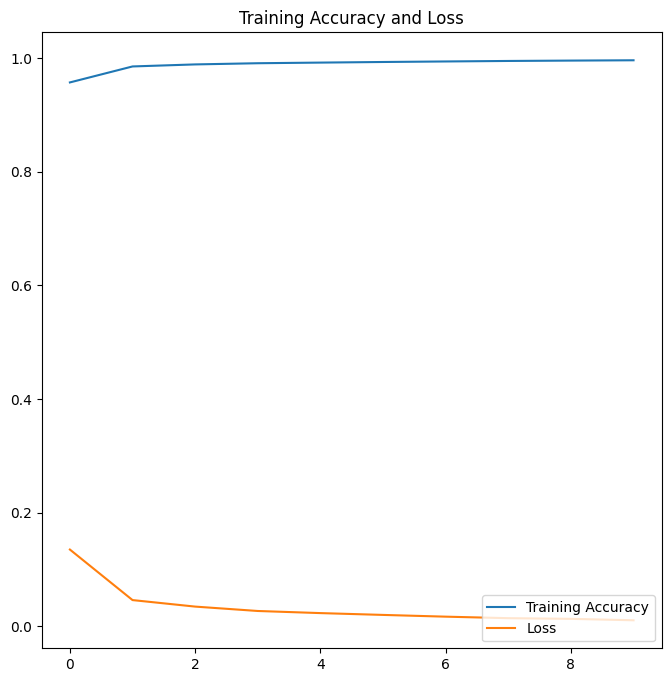

In [11]:
## Visualize Training Results

##Code cell <ThQIghvNQpqb>
# %% [code]
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

Prediction of model: 0


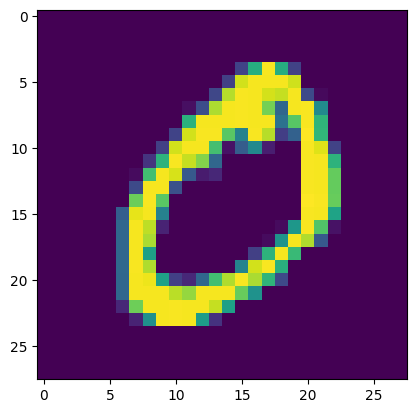

In [13]:
import numpy as np # import numpy for using argmax
import matplotlib.pyplot as plt

# ... your existing code ...

image = (train_images[1]).reshape(1,28,28,1)
# Use predict and argmax instead of predict_classes
model_pred = np.argmax(model.predict(image, verbose=0), axis=-1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Prediction of model: 4


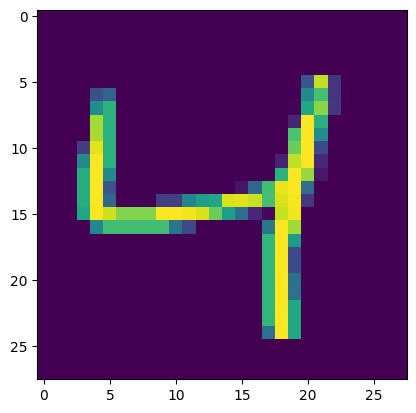

In [15]:
import numpy as np # import numpy for using argmax
import matplotlib.pyplot as plt

image = (train_images[2]).reshape(1,28,28,1)
# Use predict and argmax instead of predict_classes
model_pred = np.argmax(model.predict(image, verbose=0), axis=-1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


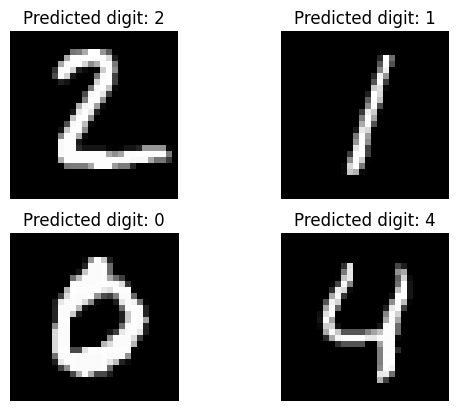

In [17]:
import numpy as np # import numpy for using argmax
import matplotlib.pyplot as plt

images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    # Use predict and argmax instead of predict_classes
    prediction = np.argmax(model.predict(test_image, verbose=0), axis=-1)


    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
from tensorflow import keras
model.save("tf-cnn-model.keras")

In [22]:
loaded_model = models.load_model("tf-cnn-model.h5")

Prediction of model: 4


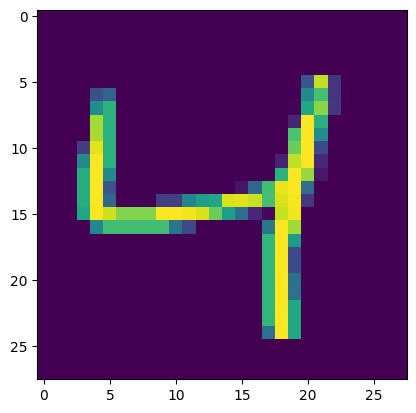

In [25]:
import numpy as np
import matplotlib.pyplot as plt

age = (train_images[2]).reshape(1,28,28,1)
# Use predict and argmax instead of predict_classes
model_pred = np.argmax(loaded_model.predict(image, verbose=0), axis=-1)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))